# NYC_311 Data Exploration

#### Import all the required libreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


#### Read the given dataset

In [2]:
pd.set_option('display.max_columns',100)
df=pd.read_csv('/Users/HITESH/Downloads/311_Service_Requests_from_2010_to_Present.csv',low_memory=False,parse_dates=['Created Date','Closed Date','Resolution Action Updated Date'])

In [3]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


#### Clean the  dataset by findiing and droping all the NAN values 

In [4]:
df.isnull().sum().head(10)

Unique Key              0
Created Date            0
Closed Date          2164
Agency                  0
Agency Name             0
Complaint Type          0
Descriptor           5914
Location Type         131
Incident Zip         2615
Incident Address    44410
dtype: int64

##### We can drop the columns which have NAN_values > 70%

In [5]:
df.drop(df.columns[[13,14,17,39,40,41,42,43,44,45,46,47,48,49]],axis=1,inplace=True)

##### Drop all the remainig rows from dataset to get a clean data set 

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum().head(10)

Unique Key          0
Created Date        0
Closed Date         0
Agency              0
Agency Name         0
Complaint Type      0
Descriptor          0
Location Type       0
Incident Zip        0
Incident Address    0
dtype: int64

##### Now let us find out the total time required for closing a complain

In [8]:
df['Resolution_time']=(df['Closed Date'] - df['Created Date']).dt.days
df['Day_of_week']=df['Created Date'].dt.dayofweek
df['Day_of_Month']=df['Created Date'].dt.day
df['Month']=df['Created Date'].dt.month

In [9]:
df['Closed Date'].diff()

0                      NaT
1          0 days 00:31:00
2          0 days 03:25:00
3          0 days 02:52:00
4        -1 days +19:41:00
                ...       
300692   -1 days +22:20:33
300694     0 days 01:20:58
300695     0 days 01:06:21
300696     0 days 00:58:15
300697     0 days 00:03:15
Name: Closed Date, Length: 245664, dtype: timedelta64[ns]

In [10]:
df['time_diff_hr']=abs(df["Closed Date"].diff().apply(lambda x: x/np.timedelta64(1, 'h')).fillna(0).astype('int64'))

In [11]:
df.to_csv('df_perfect')

In [12]:
df_perfect=pd.read_csv('df_perfect')

###### Let us view our MAP with different States

Text(0.5, 1.0, 'MAP of new_york')

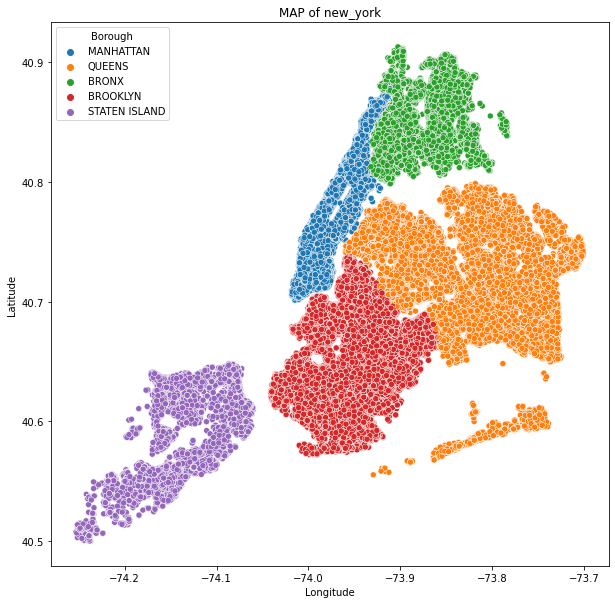

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude',y='Latitude',hue='Borough',data=df_perfect)
plt.title('MAP of new_york')

#### Complaint distribution across Boroughs

<AxesSubplot:title={'center':'Complaint distribution across Boroughs'}>

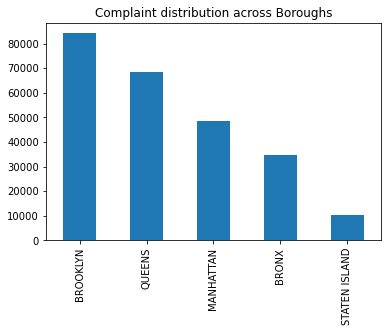

In [14]:
df_perfect['Borough'].value_counts().plot(kind='bar',title='Complaint distribution across Boroughs')

#### Most frequent Complaints in NYC

<AxesSubplot:title={'center':'Most frequent Complaints'}>

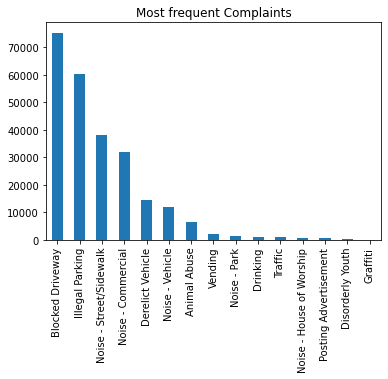

In [15]:
(df_perfect["Complaint Type"].value_counts()).head(20).plot(kind="bar",title='Most frequent Complaints')

##### Let's see the Animal abuse across the NYC

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

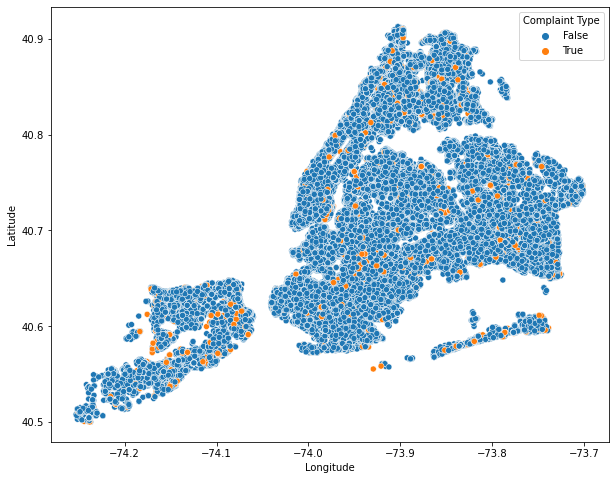

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude',y='Latitude',hue=(df_perfect['Complaint Type']=='Animal Abuse'),data=df_perfect)

##### Let's see the Illegal Parking across the NYC

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

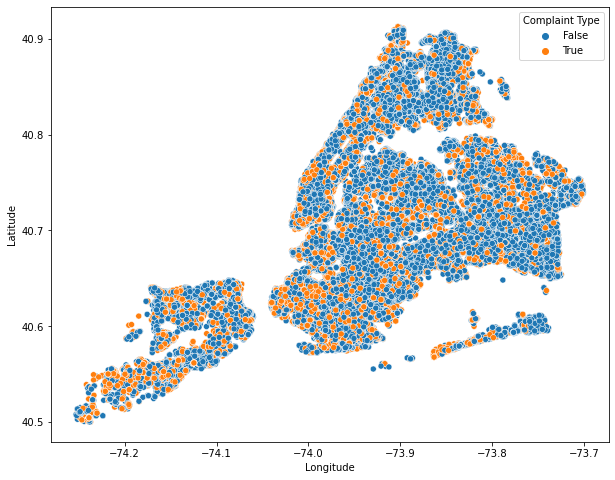

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude',y='Latitude',hue=(df_perfect['Complaint Type']=='Illegal Parking'),data=df_perfect)

##### Let's see the Blocked Driveway across the NYC

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

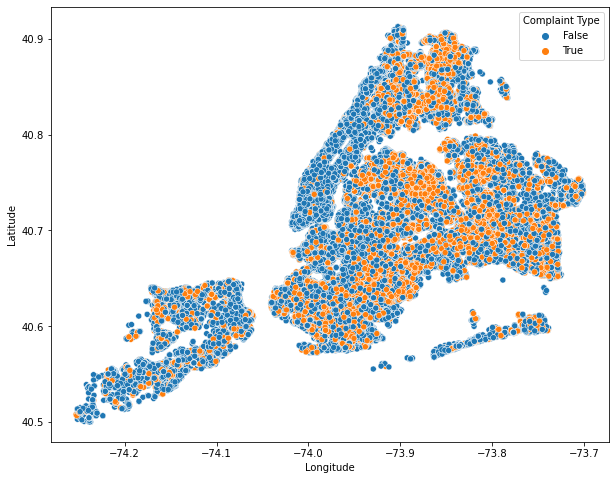

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude',y='Latitude',hue=(df_perfect['Complaint Type']=='Blocked Driveway'),data=df_perfect)

#### Average response time for a Complaint in mins

<AxesSubplot:xlabel='Complaint Type'>

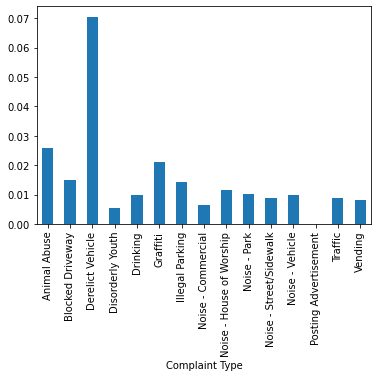

In [19]:
(df_perfect.groupby('Complaint Type').Resolution_time.mean()).plot(kind='bar')

##### Checking for the unique features across the columns

In [20]:
for feature in df_perfect:
    print('{} - {} Labels'.format(feature,len(df_perfect[feature].unique())))

Unnamed: 0 - 245664 Labels
Unique Key - 245664 Labels
Created Date - 216624 Labels
Closed Date - 200362 Labels
Agency - 1 Labels
Agency Name - 1 Labels
Complaint Type - 15 Labels
Descriptor - 41 Labels
Location Type - 14 Labels
Incident Zip - 196 Labels
Incident Address - 103943 Labels
Street Name - 6208 Labels
Cross Street 1 - 5777 Labels
Cross Street 2 - 5792 Labels
Address Type - 3 Labels
City - 51 Labels
Facility Type - 1 Labels
Status - 1 Labels
Due Date - 216842 Labels
Resolution Description - 11 Labels
Resolution Action Updated Date - 200960 Labels
Community Board - 70 Labels
Borough - 5 Labels
X Coordinate (State Plane) - 57760 Labels
Y Coordinate (State Plane) - 66684 Labels
Park Facility Name - 1 Labels
Park Borough - 5 Labels
School Name - 1 Labels
School Number - 1 Labels
School Region - 1 Labels
School Code - 1 Labels
School Phone Number - 1 Labels
School Address - 1 Labels
School City - 1 Labels
School State - 1 Labels
School Zip - 1 Labels
School Not Found - 1 Labels
Lat

### Let's pridict the resolution time for Animal Abuse issues in NYC

In [21]:
df_Derelict_vichicle=df[df['Complaint Type']=='Derelict Vehicle']

In [22]:
df_Derelict_vichicle.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Resolution_time,Day_of_week,Day_of_Month,Month,time_diff_hr
count,1.447700e+04,14477.000000,1.447700e+04,14477.000000,14477.000000,14477.000000,14477.000000,14477.000000,14477.000000,14477.000000,14477.000000
mean,3.130489e+07,11084.762382,1.012217e+06,192986.667542,40.696287,-73.899080,0.070526,2.545831,15.915797,7.947503,6.151136
std,5.802674e+05,430.787863,2.932826e+04,29343.217581,0.080525,0.105744,0.362953,1.881595,8.864397,2.565663,11.139974
min,3.027976e+07,10001.000000,9.150470e+05,122077.000000,40.501500,-74.248867,0.000000,0.000000,1.000000,3.000000,0.000000
25%,3.080675e+07,11101.000000,9.984960e+05,170211.000000,40.633862,-73.948666,0.000000,1.000000,8.000000,6.000000,1.000000
50%,3.131249e+07,11234.000000,1.013782e+06,190089.000000,40.688316,-73.893499,0.000000,2.000000,16.000000,8.000000,3.000000
75%,3.180317e+07,11385.000000,1.033367e+06,208371.000000,40.738430,-73.822800,0.000000,4.000000,23.000000,10.000000,7.000000
max,3.231028e+07,11697.000000,1.067106e+06,271090.000000,40.910711,-73.700993,9.000000,6.000000,31.000000,12.000000,518.000000


##### Selecting the feature and scaling the  feature

In [23]:
def built_feature(dataset):
    df_feature = dataset.filter(['Borough','Incident Zip','Resolution_time','Day_of_week','Day_of_Month','Month','time_diff_hr'],axis=1)
    data=pd.DataFrame({'Borough':df_feature.Borough})
    dummies=pd.get_dummies(data)
    df_model=pd.concat([df_feature,dummies],axis=1)
    df_model=df_model.drop('Borough',1)
    df_model['Incident Zip']= df_model['Incident Zip'].astype(int)
    df_model['Resolution_time']=df_model['Resolution_time'].astype(int)
    df_model['Incident Zip']=df_model['Incident Zip']-df_model['Incident Zip'].min()
    return df_model

In [24]:
df_Derelict_vichicle.drop(df_Derelict_vichicle[df_Derelict_vichicle.time_diff_hr > 50].index,inplace=True)
df_Derelict_vichicle.shape

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(14335, 44)

In [25]:
df_model=built_feature(df_Derelict_vichicle)




In [26]:
df_model.head(3)


,Incident Zip,Resolution_time,Day_of_week,Day_of_Month,Month,time_diff_hr,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND
14,1378,0,3,31,12,1,0,0,0,1,0
151,1233,0,3,31,12,2,0,1,0,0,0
255,1220,0,3,31,12,0,0,1,0,0,0


#### Spliting the data in train and test

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df_model,df_model['time_diff_hr'],test_size=0.25,random_state=0,stratify=df_model['time_diff_hr'])




## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
rnd=RandomForestClassifier(n_estimators=100)
rnd.fit(x_train,y_train)

pred= rnd.predict(x_test)
accuracy=accuracy_score(y_test,pred)
accuracy

0.8166852678571429